<img alt="Pascual logo" height="120px" src="https://github.com/andresperez86/Data_Analysis_20252/blob/master/cropped-Institucion_Pascual_Bravo_Logo.png?raw=true" align="center" hspace="10px" vspace="10px" style="width:520px;height:152px;">
<h1><font color='01b3c2'> <center>  Law of Large Numbers </font> </center>

<font  face="Courier New" size="3">
 <p><center>Prof. Andres Fernando Pérez  MSc.</center></p>
</font>

**Goal:** Empirically verify the Law of Large Numbers (LLN) using a large Bernoulli sample generated with PySpark.

# Practicum 1: *Law of Large Numbers*
### Objective:
This notebook explores the **Law of Large Numbers (LLN)** through the **exponential** distribution. We will show how, as the number of observations increases, the average of the data tends toward the expected value of the distribution.
### Key Concepts:
1. **Exponential Distribution**: Models events that occur continuously and independently at a constant rate.
2. **Law of Large Numbers**: As we increase the number of samples $ n $, the sample mean $ \bar{X}_n $ approaches the mathematical expectation $ E[X] $.
3. **Visualization**: We will represent the convergence of the mean with graphs to facilitate understanding.

> We consider a sequence of independent and identically distributed (i.i.d.) random variables  (v.a. i.i.d.)  $x_1, \dots , x_n$ each with exponential distribution $\varepsilon(\lambda)$, where $\lambda$ is the parameter of the exponential distribution. Then, for each $n$ in the range from $1$ to $3000$, observations $x_1, \dots , x_n$ are generated and the
>
>  >   $$\bar x_n = \frac 1 n \sum_{i=1}^n x_i $$
>
>   This is equivalent to generating an observation of the random variable:
>
>
>   $$\bar X_n = \frac 1 n \sum_{i=1}^n X_i$$

---

be:

$$X_i \sim \varepsilon(\lambda)$$

Since the $𝑋_i$ are i.i.d. random variables with exponential distribution
$ε(λ)$, the mean and variance of each $𝑋_i$ are:

* Mean (expected value): $E[X_i] = \frac 1 \lambda$,

 * Variance: $V[X_i] = \frac 1 {\lambda^2}$

I choose $\lambda = 5$ for all experiments.

#### For *Exponential*($\lambda$)

[Hint: Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)

* ***PDF***:
$$f_X(x) = \lambda e^{-\lambda x}$$

* ***CDF***:
$$F_X(x) = 1 - \lambda e^{-\lambda x}$$

    xs        ys
0  0.0  5.000000
1  0.1  3.032653
2  0.2  1.839397
3  0.3  1.115651
4  0.4  0.676676


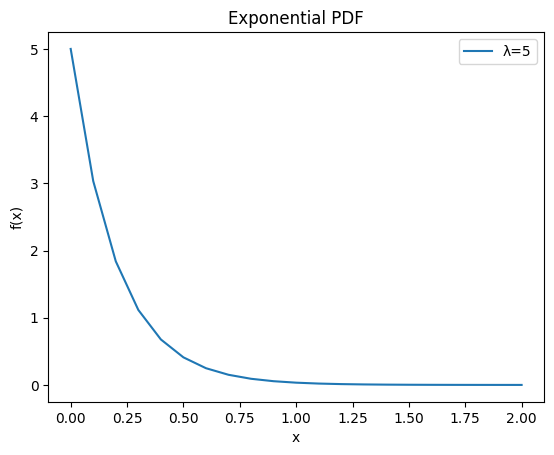

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(10)

def exponential_pdf(lmbda, x):
    return lmbda * np.exp(-lmbda * x)

def exponential_grid(lmbda, desde=0, hasta=2, step=0.1):
    xs = np.arange(desde, hasta + step, step)
    ys = [exponential_pdf(lmbda, x) for x in xs]

    valores = pd.DataFrame({
        'xs': xs,
        'ys': ys
    })

    return valores

# define the parameter
lmbda_ = 5  # @param {type:"number"}

# now use it
grid = exponential_grid(lmbda=lmbda_)
print(grid.head())

# optional: plot PDF
plt.plot(grid['xs'], grid['ys'], label=f'λ={lmbda_}')
plt.title("Exponential PDF")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

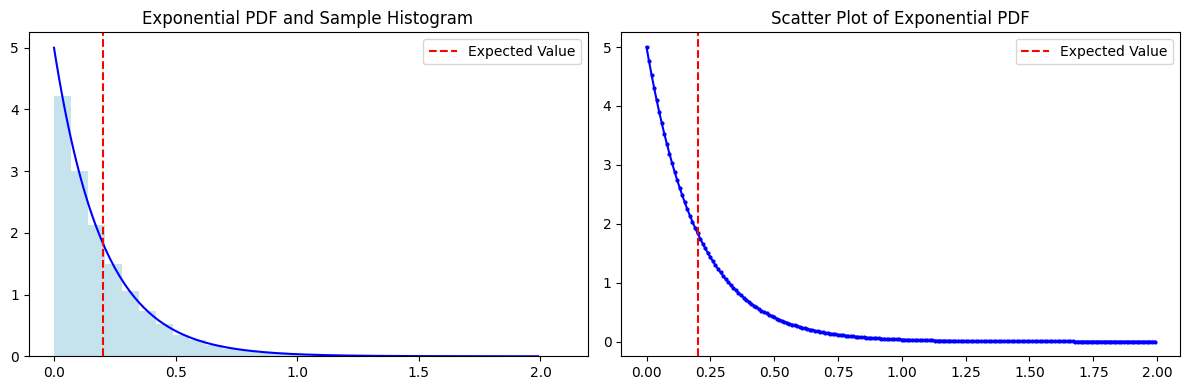

In [25]:
# @markdown ---
# @markdown ### Generate random samples following $\varepsilon(\lambda)$ :
# @markdown ---

lambda_val = lmbda_
muestras_de_exponencial = np.random.exponential(scale=1 / lambda_val, size=30000)

# Calculate the expected value
esperanza_exp = 1 / lambda_val

# Create a range of x values for the PDF
x_values = np.arange(0, 2, 0.01)

# Calculate the corresponding PDF values
pdf_values = [exponential_pdf(lambda_val, x) for x in x_values]

# Create a 1x2 grid for plots
plt.figure(figsize=(12, 4))

# Plot the histogram and PDF on the left
plt.subplot(121)
plt.hist(muestras_de_exponencial, bins=30, density=True, color="lightblue", alpha=0.7)
plt.plot(x_values, pdf_values, color="blue")
plt.axvline(x=esperanza_exp, color="red", linestyle="--", label="Expected Value")
plt.legend()
plt.title("Exponential PDF and Sample Histogram")

# Scatter plot on the right
plt.subplot(122)
plt.plot(x_values, pdf_values, marker='o', markersize=2, color="blue")
plt.axvline(x=esperanza_exp, color="red", linestyle="--", label="Expected Value")
plt.legend()
plt.title("Scatter Plot of Exponential PDF")

plt.tight_layout()
plt.show()

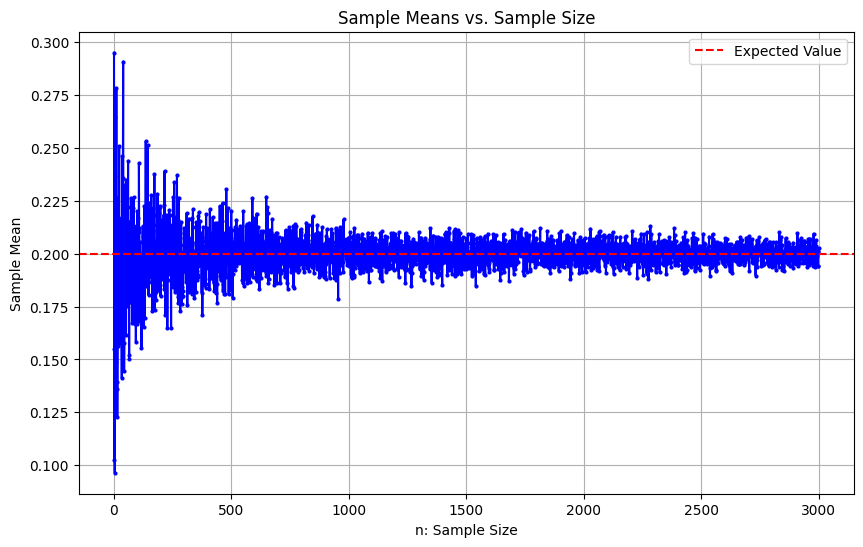

In [142]:
# @markdown ### Determine the mean as the observations vary. :

max_n = 3000 # @param {type:"number"}
lambda_val = lmbda_

# Initialize an array for storing the averages
promedios = np.zeros(max_n)

# Calculate the averages for different sample sizes
for i in range(1, max_n + 1):
    samples = np.random.exponential(scale=1 / lambda_val, size=i)
    promedios[i - 1] = np.mean(samples)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), promedios, marker='o', markersize=2, color="blue")
plt.axhline(y=1 / lambda_val, color="red", linestyle="--", label="Expected Value")
plt.xlabel("n: Sample Size")
plt.ylabel("Sample Mean")
plt.title("Sample Means vs. Sample Size")
plt.legend()
plt.grid()
plt.show()


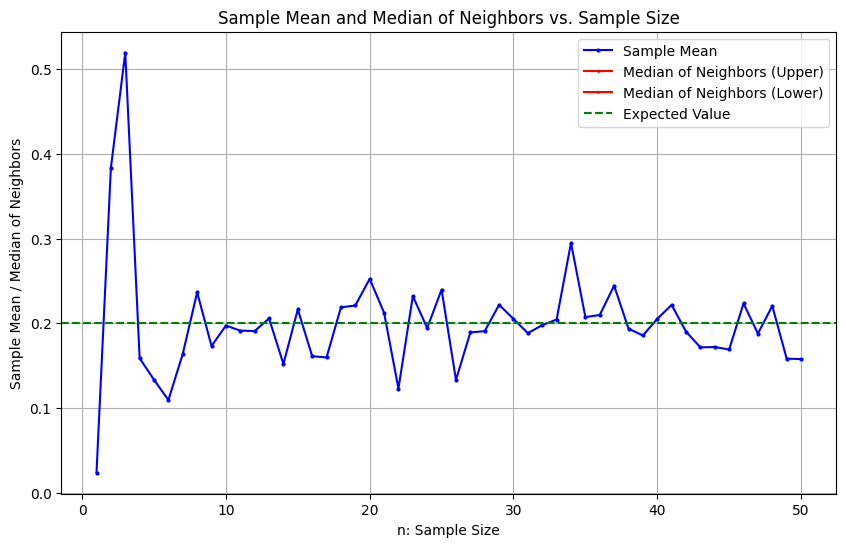

In [27]:
# @markdown ###  Determine the median as the observations vary:

# Parameters
n_veci = 50

# Initialize arrays for storing the medians of neighboring sample means
prom_vecinos_sup = np.zeros(max_n)
prom_vecinos_inf = np.zeros(max_n)

# Calculate the medians for neighboring sample means
rango_reduc = np.arange(n_veci, max_n - n_veci)
for i in rango_reduc:
    vecinos = np.arange(i - n_veci + 1, i + n_veci + 1)
    prom_vecinos_sup[i] = np.median(np.abs(promedios[vecinos] - 1 / lambda_val)) + 1 / lambda_val
    prom_vecinos_inf[i] = np.median(-np.abs(promedios[vecinos] - 1 / lambda_val)) + 1 / lambda_val

promedios_de = {}

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), promedios, marker='o', markersize=2, color="blue", label="Sample Mean")
plt.plot(range(n_veci, max_n - n_veci), prom_vecinos_sup[n_veci:max_n - n_veci], marker='o', markersize=1, color="red", label="Median of Neighbors (Upper)")
plt.plot(range(n_veci, max_n - n_veci), prom_vecinos_inf[n_veci:max_n - n_veci], marker='o', markersize=1, color="red", label="Median of Neighbors (Lower)")
plt.axhline(y=1 / lambda_val, color="green", linestyle="--", label="Expected Value")
plt.xlabel("n: Sample Size")
plt.ylabel("Sample Mean / Median of Neighbors")
plt.title("Sample Mean and Median of Neighbors vs. Sample Size")
plt.legend()
plt.grid()
plt.show()

>  What do you observe? What is the reason for this?

It can be observed that the averages obtained with different $n$ values are concentrated in the expectation $E[X_i]$ of the random variable from which the samples originate:

$$X_i \sim \varepsilon(\lambda=4)$$

Whose hope is

$$E[X_i] = \frac 1 \lambda = \frac 1 4$$

This is due to the [Law of Large Numbers](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros), which shows that any random variable with finite variance will (in the limit) converge to its expected value when averaging $n$ realizations.


> 2. To appreciate the **Law of Large Numbers** even more, perform the following experiment:
>
>   **(a)** Consider two observations $x_1$ and $x_2$ of independent random variables $X_1$ and $X_2$ with distribution $\varepsilon(\lambda)$ and **save the average of both**, that is, $\bar x_2$.
>   
>   Repeat 1000 times and, based on the values obtained, create a ***histogram and a box plot***.
>
>   What characteristics do they have?


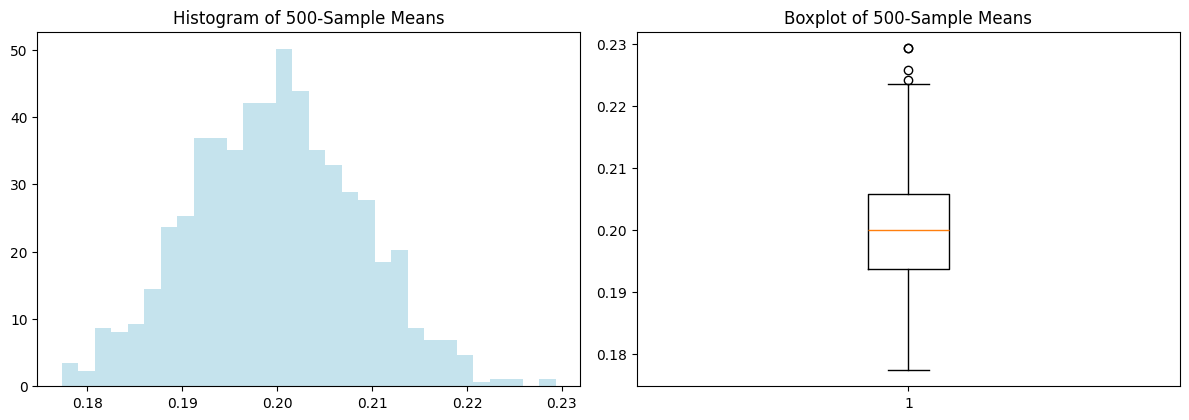

In [150]:
# Parameters n=[2 , 5, 30, 500]
lambda_val = lmbda_
cant_exper = 1000 # @param {type:"number"}
n = 500 # @param {type:"number"}

# Initialize an array for storing the means of 2-sample means
promedios_de[str(n)] = np.zeros(cant_exper)

# Calculate the means of 2-sample means
for i in range(cant_exper):
    samples = np.random.exponential(scale=1 / lambda_val, size=n)
    promedios_de[str(n)][i] = np.mean(samples)

# Create a 2x2 grid for plots
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(promedios_de[str(n)], bins=30, density=True, color="lightblue", alpha=0.7)
plt.title("Histogram of {0}-Sample Means".format(n))

# Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(promedios_de[str(n)])
plt.title("Boxplot of {0}-Sample Means".format(n))

# Show the plots
plt.tight_layout()
plt.show()

>   **(b)** Aumentar a **cinco** las **variables promediadas**, es decir, considerar ahora **n = 5** observaciones de variables aleatorias independientes con la misma distribución del ítem anterior y guardar $\bar x_5$.
>
>   Repetir 1000 veces y realizar un histograma y un boxplot para los valores obtenidos.
>
>   Comparar con los obtenidos en el ítem anterior. ¿Qué se observa?

>   **(c)** Aumentar a n = 30 el número de observaciones de v.a. i.i.d. y repetir el ítem anterior.
>
>   Repetir todo con n = 500.

>   **(d)** Realizar ***boxplots e histogramas*** de los 4 conjuntos de datos en el mismo gráfico.
>
>   ¿Qué pasaría si se siguiera aumentando el tamaño de la muestra?

---

In [21]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("LLN-PySpark-Mini").getOrCreate()
spark

## 1) Parameters
Change these and rerun to explore LLN behavior.

In [29]:

N = 1_000_000   # total rows
p = 0.3         # Bernoulli success probability
seed = 123
N, p

(1000000, 0.3)

## 2) Generate Bernoulli Data in Spark
We create a column `x ∈ {0,1}` where `P(x=1)=p`.

In [42]:
from pyspark.sql import functions as F

df = (spark.range(N)
      .withColumn("x", (F.rand(seed) <= F.lit(p)).cast("int")))
df.head(20)

[Row(id=0, x=1),
 Row(id=1, x=0),
 Row(id=2, x=0),
 Row(id=3, x=0),
 Row(id=4, x=1),
 Row(id=5, x=0),
 Row(id=6, x=0),
 Row(id=7, x=0),
 Row(id=8, x=0),
 Row(id=9, x=0),
 Row(id=10, x=0),
 Row(id=11, x=0),
 Row(id=12, x=0),
 Row(id=13, x=0),
 Row(id=14, x=0),
 Row(id=15, x=0),
 Row(id=16, x=0),
 Row(id=17, x=1),
 Row(id=18, x=0),
 Row(id=19, x=1)]


## 3) Global Sample Mean ≈ True Mean
For large `N`, `avg(x)` should be close to `p`.

In [43]:

global_stats = df.agg(F.avg("x").alias("sample_mean"),
                      F.count("*").alias("n"))
global_stats.show(truncate=False)


+-----------+-------+
|sample_mean|n      |
+-----------+-------+
|0.299508   |1000000|
+-----------+-------+



## 4) Running Mean (Small Subset for Plot)
Computing a cumulative average for all rows is expensive. We take the first `M` rows and compute a running mean to **see** convergence.

In [44]:

from pyspark.sql.window import Window

M = 50_000
df_sub = df.orderBy("id").limit(M).cache()

w = Window.orderBy("id").rowsBetween(Window.unboundedPreceding, Window.currentRow)
df_running = (df_sub
              .withColumn("cum_sum", F.sum("x").over(w))
              .withColumn("n", F.row_number().over(w))
              .withColumn("running_mean", F.col("cum_sum")/F.col("n"))
              .select("id","running_mean"))

# Downsample for lighter plotting
step = 100
df_running_ds = df_running.where(F.col("id") % step == 0).orderBy("id")
running_pd = df_running_ds.toPandas()
running_pd.head()

,id,running_mean
0,0,1.000000
1,100,0.297030
2,200,0.283582
3,300,0.269103
4,400,0.281796


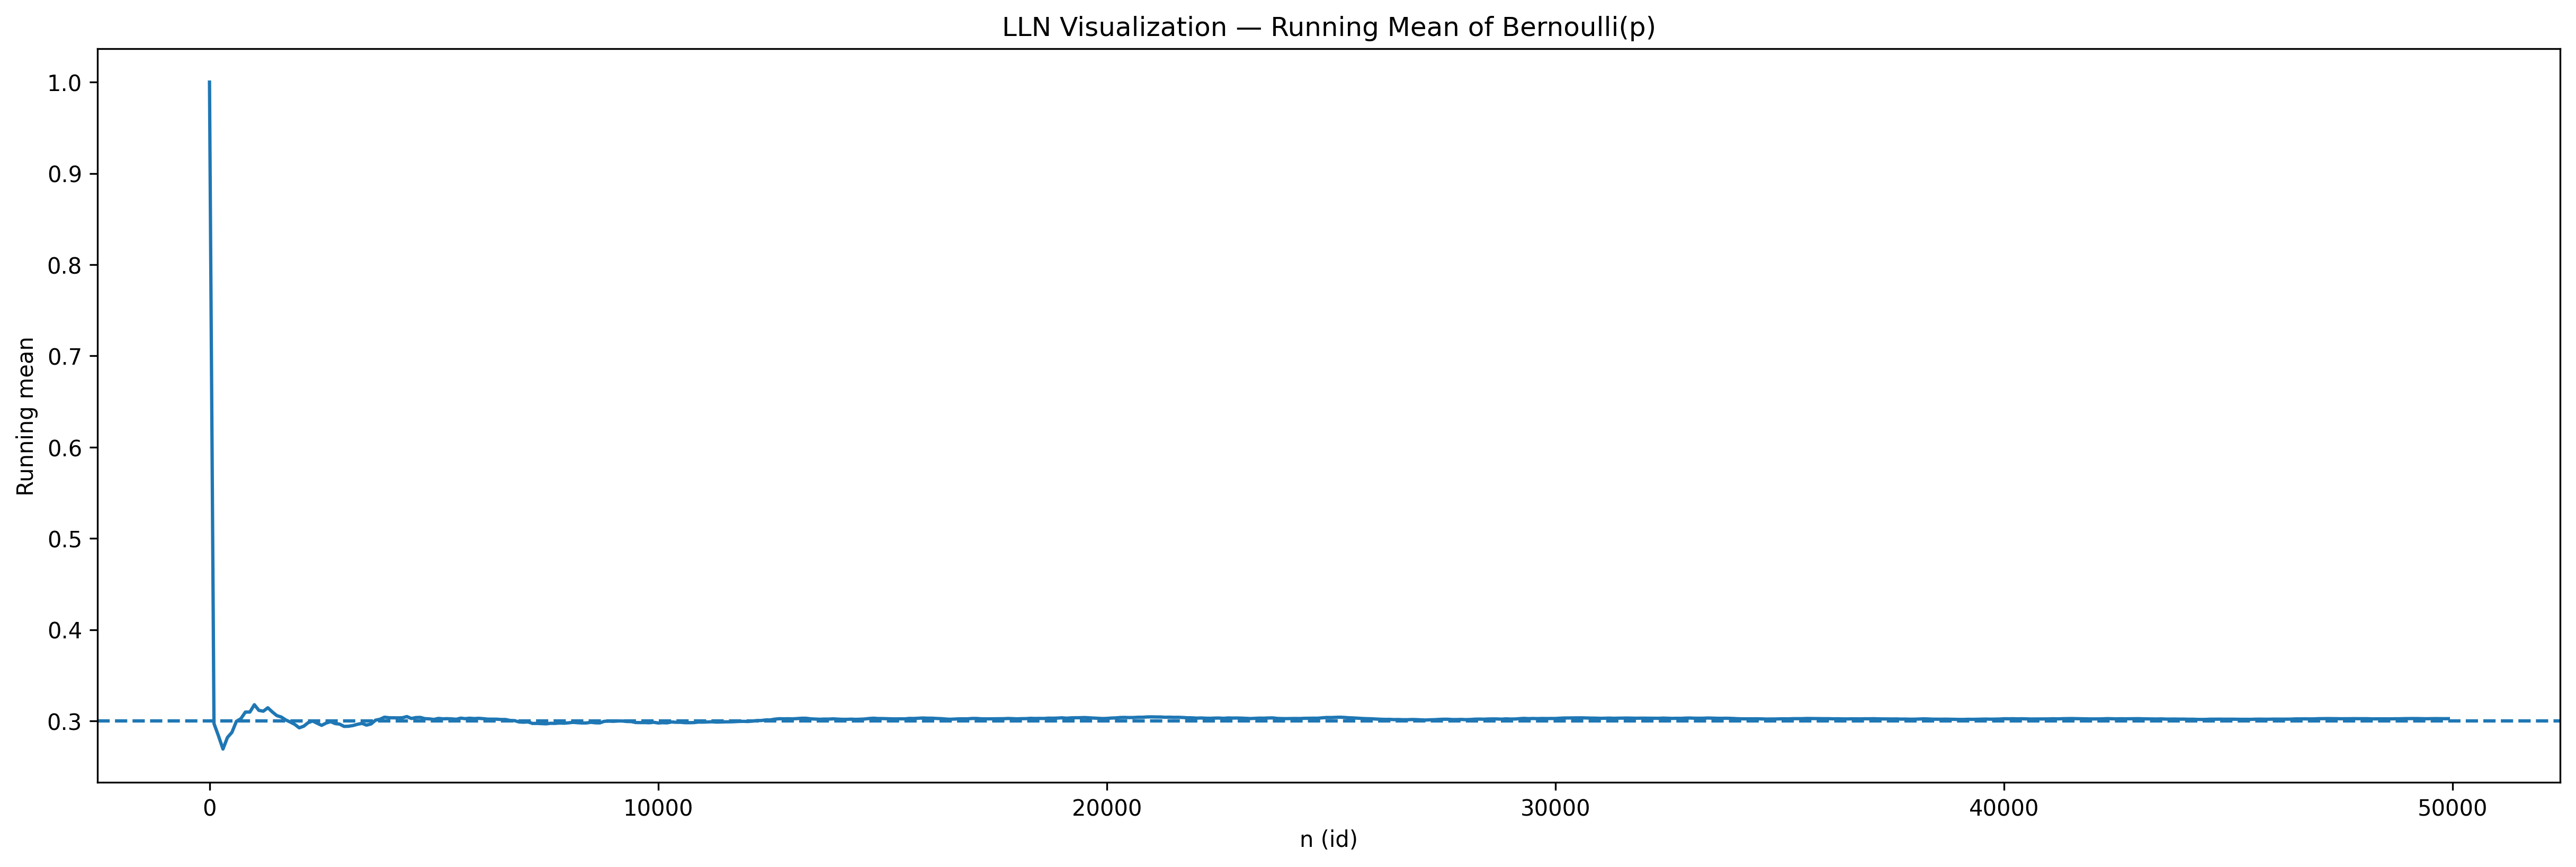

In [45]:

import matplotlib.pyplot as plt

plt.figure(figsize=[20,6], dpi=300,)
plt.plot(running_pd["id"], running_pd["running_mean"])
plt.axhline(p, linestyle="--")
plt.xlabel("n (id)")
plt.ylabel("Running mean")
plt.title("LLN Visualization — Running Mean of Bernoulli(p)")
plt.show()


## 5) (Optional) Block Means
A scalable alternative: average in blocks, then compute the cumulative mean of block means.

In [47]:

block_size = 2_000
df_blocks = (df
             .withColumn("block_id", (F.col("id")/block_size).cast("long"))
             .groupBy("block_id")
             .agg(F.count("*").alias("block_n"),
                  F.avg("x").alias("block_mean"))
             .orderBy("block_id"))

from pyspark.sql.window import Window
w_blk = Window.orderBy("block_id").rowsBetween(Window.unboundedPreceding, Window.currentRow)
df_blocks_cum = (df_blocks
                 .withColumn("cum_sum", F.sum(F.col("block_mean")*F.col("block_n")).over(w_blk))
                 .withColumn("cum_n", F.sum("block_n").over(w_blk))
                 .withColumn("cum_mean", F.col("cum_sum")/F.col("cum_n"))
                 .select("block_id","cum_n","cum_mean"))

blocks_pd = df_blocks_cum.toPandas()
blocks_pd.head()

,block_id,cum_n,cum_mean
0,0,2000,0.292000
1,1,4000,0.303250
2,2,6000,0.302833
3,3,8000,0.297875
4,4,10000,0.297600


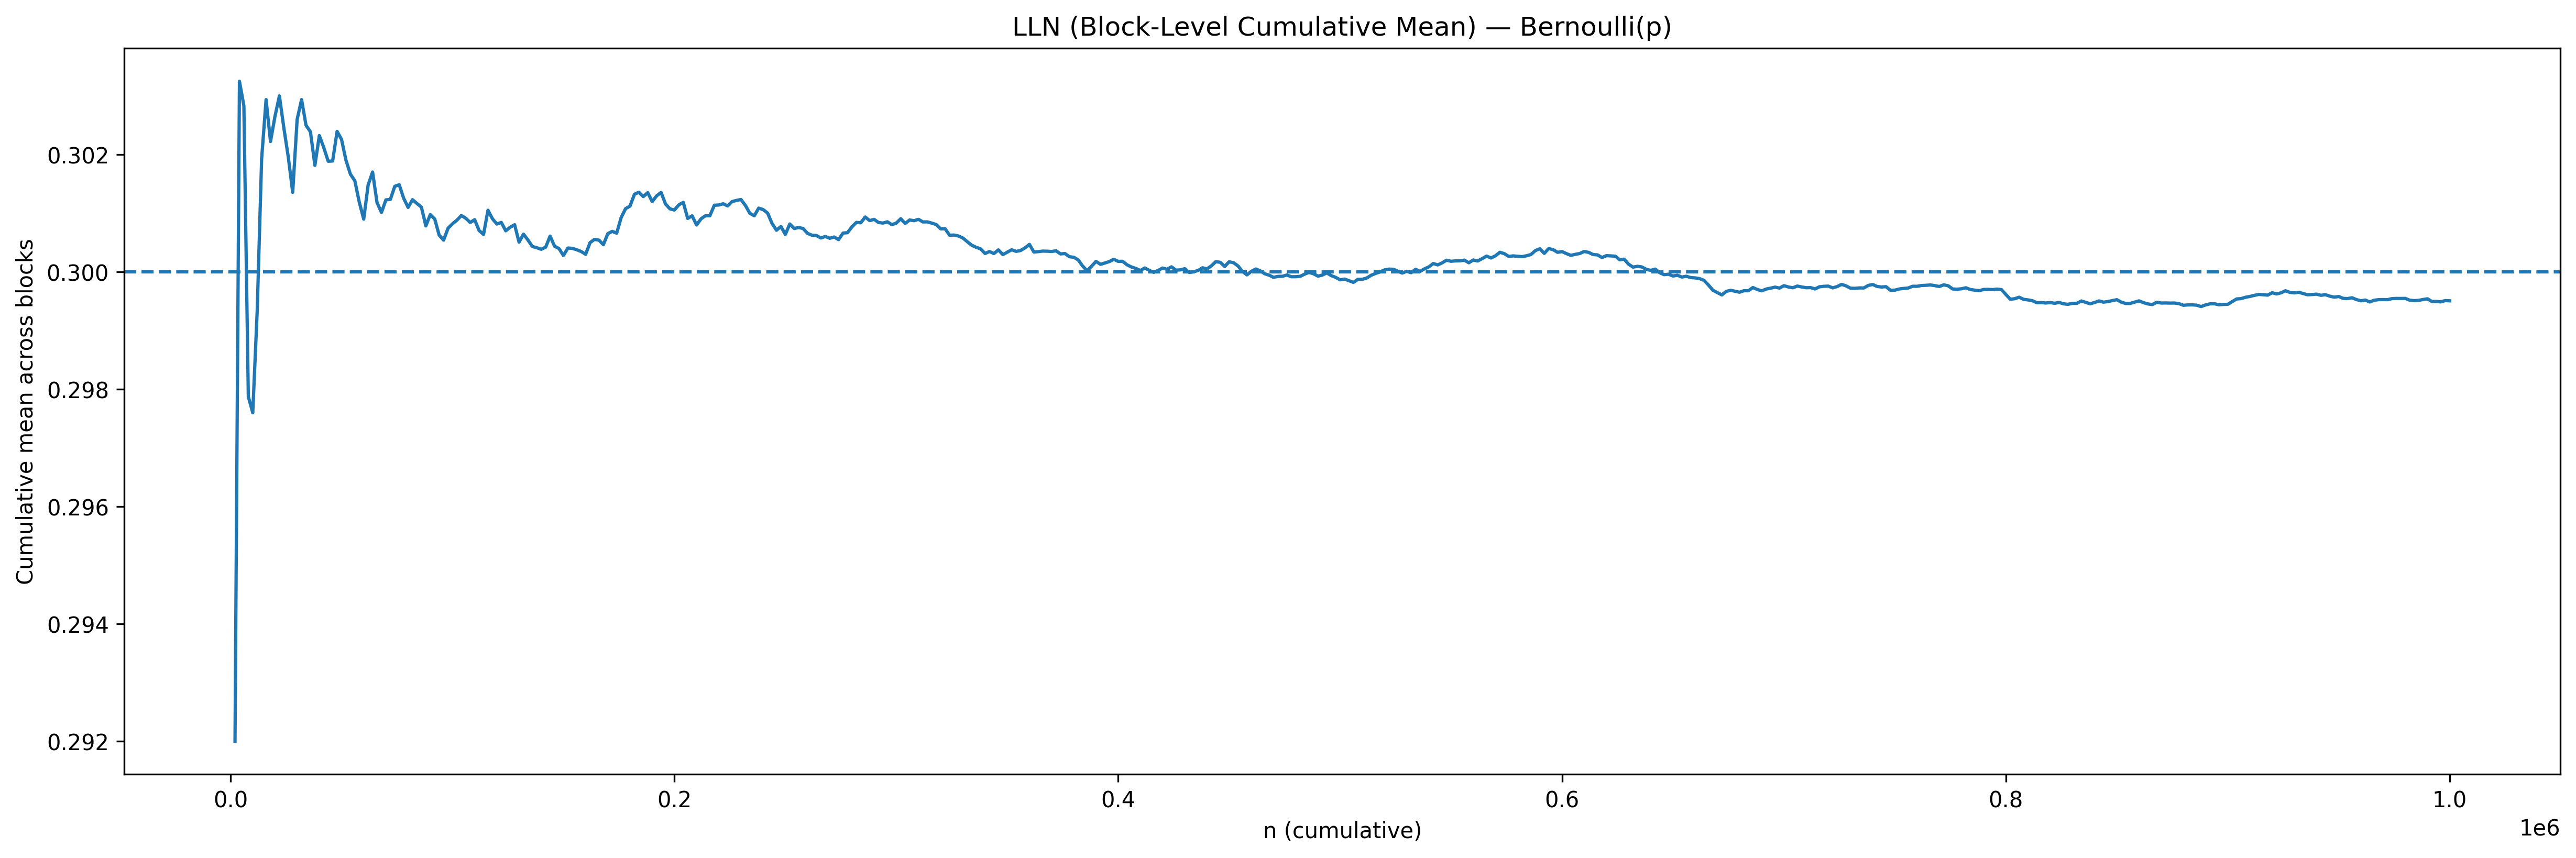

In [48]:
plt.figure(figsize=[20,6], dpi=300,)
plt.plot(blocks_pd["cum_n"], blocks_pd["cum_mean"])
plt.axhline(p, linestyle="--")
plt.xlabel("n (cumulative)")
plt.ylabel("Cumulative mean across blocks")
plt.title("LLN (Block-Level Cumulative Mean) — Bernoulli(p)")
plt.show()

## 6) Takeaways
- As `n` grows, the sample mean approaches `p` (the true mean).  
- Running mean and block cumulative mean give two simple visual confirmations of LLN.  
- Try changing `p` and `N` to see stability vs. variability.

# *Central Limit Theorem*

The **Central Limit Theorem** tells us that when we perform the following transformation with averages:
>
>   $$\frac{\bar X_n - E[X_1]}{\sqrt\frac{Var(X_1)}{n}}$$
>
> The **distribution** of this random variable approximates that of the standard normal if $n$ is ***sufficiently large***.
>
> We will verify this result using a simulation.

In [149]:
#@markdown **(a)** Perform the transformation mentioned in the 4 datasets
#@markdown and plot parallel boxplots.

# Parameters
n_values = [2, 5, 30, 500]

# Initialize arrays for storing the transformed values
transformed_values = {}

# Calculate the standardized values for different sample sizes
for n in n_values:
    promedios = promedios_de[str(n)]
    transformed_values[n] = (promedios - (1 / lambda_val)) / np.sqrt((1 / lambda_val**2) / n)

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([transformed_values[n] for n in n_values], labels=n_values)
plt.title("Boxplot of Standardized Sample Means")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standardized Value")
plt.grid()
plt.show()

KeyError: '500'

/tmp/ipython-input-3833658261.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([transformed_values[n] for n in n_values if n in transformed_values], labels=[str(n) for n in n_values if n in transformed_values])


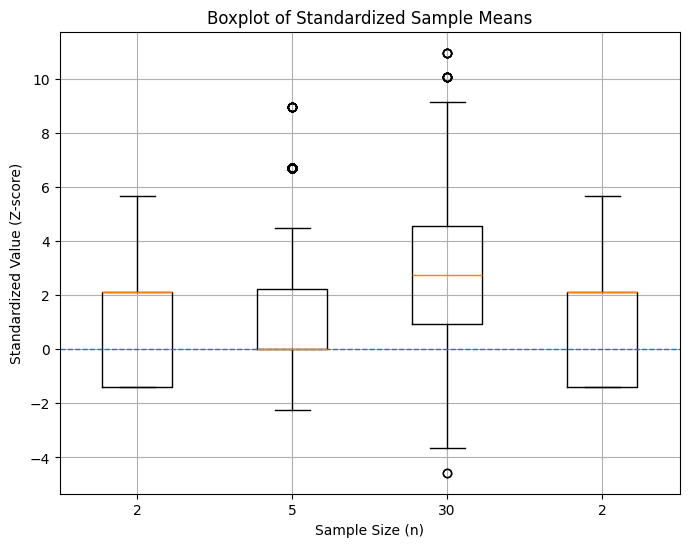

In [153]:
#@markdown **(b)**Create **4 histograms** and superimpose
#@markdown **standard normal density** on each one.

# Parameters
n_values = [2, 5, 30, 500]

# Initialize a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Loop through the sample sizes
for i, n in enumerate(n_values):
    # Calculate the standardized values for the current sample size
    promedios = promedios_de[str(n)]
    transformed_values = (promedios - (1 / lambda_val)) / np.sqrt((1 / lambda_val**2) / n)

    # Create histograms
    ax = axs[i // 2, i % 2]
    ax.hist(transformed_values, bins=30, density=True, color="lightblue")

    # Overlay a standard normal distribution curve
    x = np.linspace(-6, 6, 100)
    ax.plot(x, stats.norm.pdf(x), color="orange")

    # Add legends
    ax.legend(["Normal estándar", "Muestra normalizada"], loc="upper right")

    # Set subplot titles
    ax.set_title(f"n={n}")

    # Set x and y axis labels
    ax.set_xlabel("Standardized Value")
    ax.set_ylabel("Density")

# Show the plots
plt.tight_layout()
plt.show()


It is possible to observe how, despite having exponential random variables ranging between $0$ and $+\infty$, when normalizing the averages, we obtain negative values.

**As we increase the sample size**, the frequency and values of the averages obtained closely resemble a **standard normal distribution**.
.

4. We will repeat the previous items, now generating samples of independent random variables with distribution Bi(n,p), with n=10 and p=1/4, and with the binomial distribution


> [Hint: Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).

In [154]:
def binomial_pmf(n, p, k):
    return stats.binom.pmf(k, n, p)

def grilla_binomial(n, p, desde=0, hasta=n, step=1):
    xs = np.arange(desde, hasta + step, step)
    ys = [binomial_pmf(n, p, x) for x in xs]

    valores = pd.DataFrame({
        'xs': xs,
        'ys': ys
    })

    return valores

np.random.seed(10)

n = 10 # @param {type:"number"}
p = 0.25 # @param {type:"number"}
n_max = 3000 # @param {type:"number"}

grid = grilla_binomial(n, p)
print(grid.head())

   xs        ys
0   0  0.221302
1   1  0.360258
2   2  0.263910


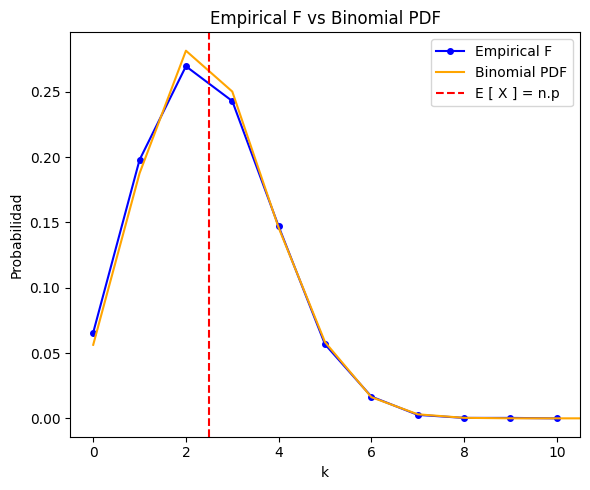

In [127]:
# @markdown ---
# @markdown ###  Generate samples following $Bi(n, p)$:
# @markdown ---

# Parameters
esperanza_binomial = n * p

# Generate random binomial samples
muestras_de_binomial = np.random.binomial(n, p, size=n_max)

# Calculate counts for each k value
counts = np.zeros(n + 1)
for k in range(n + 1):
    counts[k] = np.sum(muestras_de_binomial == k)

# Normalize frequencies to obtain an empirical probability mass function (PMF)
empirica = counts / n_max

# Create the first plot comparing empirical and binomial PMF
plt.figure(figsize=(6, 5))

plt.plot(range(n + 1), empirica, marker='o', markersize=4, label='Empirical F', color='blue')
plt.plot(grilla_binomial(n, p)['xs'], grilla_binomial(n, p)['ys'], label='Binomial PDF', color='orange')
plt.axvline(esperanza_binomial, color='red', linestyle='--', label='E [ X ] = n.p')
plt.title('Empirical F vs Binomial PDF')
plt.xlabel('k')
plt.ylabel('Probabilidad')
plt.xlim(-0.5,10.5)
plt.legend()

plt.tight_layout()
plt.show()

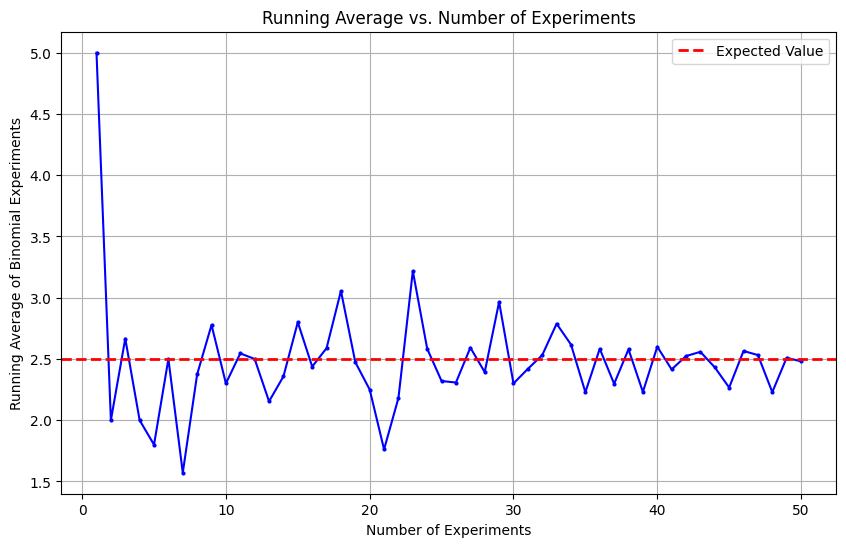

In [128]:
# @markdown ### Determine the mean as the observations vary:


# Initialize an array for storing the running averages
promedios = np.zeros(max_n)

# Calculate the running averages for different sample sizes
for i in range(1, max_n + 1):
    samples = np.random.binomial(n, p, size=i)
    promedios[i - 1] = np.mean(samples)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), promedios, marker='o', markersize=2, color="blue")
plt.axhline(y=n * p, color="red", linestyle="--", linewidth=2, label="Expected Value")
plt.xlabel("Number of Experiments")
plt.ylabel("Running Average of Binomial Experiments")
plt.title("Running Average vs. Number of Experiments")
plt.legend()
plt.grid()
plt.show()

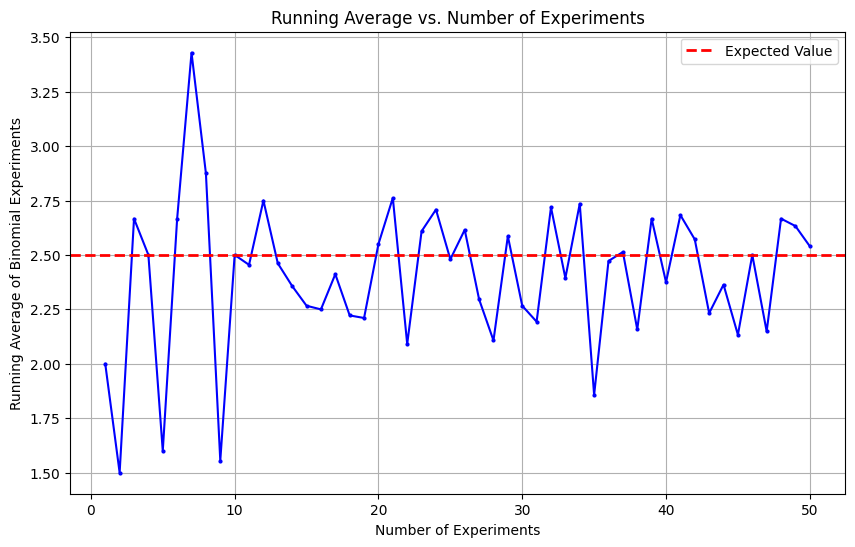

In [129]:
# @markdown ### Determine the relative frequency when varying the comments:

# Initialize an array for storing the running averages
promedios = np.zeros(max_n)

# Calculate the running averages for different sample sizes
for i in range(1, max_n + 1):
    samples = np.random.binomial(n, p, size=i)
    promedios[i - 1] = np.mean(samples)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), promedios, marker='o', markersize=2, color="blue")
plt.axhline(y=n * p, color="red", linestyle="--", linewidth=2, label="Expected Value")
plt.xlabel("Number of Experiments")
plt.ylabel("Running Average of Binomial Experiments")
plt.title("Running Average vs. Number of Experiments")
plt.legend()
plt.grid()
plt.show()

> **(a)** Consider two observations $x_1$ and $x_2$ of independent random variables $X_1$ and $X_2$ with distribution $Bi(n, p)$ and **save the average of both**.
>
> Repeat 1000 times and, based on the values obtained, create a ***histogram and a box plot***.
>
> What characteristics do they have?

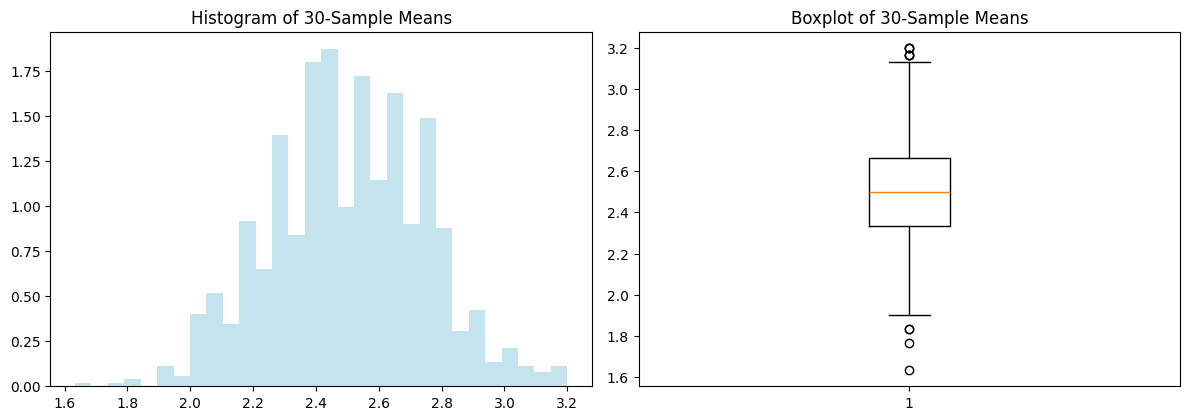

In [130]:

cant_exper = 1000 # @param {type:"number"}
o = 2 # @param {type:"number"}

# Initialize an array for storing the means of 2-sample means
promedios_de[str(o)] = np.zeros(cant_exper)

# Calculate the means of 2-sample means
for i in range(cant_exper):
    samples = np.random.binomial(n, p, size=o)
    promedios_de[str(o)][i] = np.mean(samples)

# Create a 2x2 grid of plots
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(promedios_de[str(o)], bins=30, density=True, color="lightblue", alpha=0.7)
plt.title("Histogram of {0}-Sample Means".format(o))

# Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(promedios_de[str(o)])
plt.title("Boxplot of {0}-Sample Means".format(o))

# Show the plots
plt.tight_layout()
plt.show()

> **(b)** Increase the **averaged variables** to **five**, that is, now consider **n = 5** observations of independent random variables with the same distribution as the previous item and save $\bar x_5$.
> Compare with those obtained in the previous item. What do you observe?

> **(c)** Increase the number of i.i.d. observations of v.a. to n = 30 and repeat the previous item.
>
> Repeat everything with n = 500.

Following the **Central Limit Theorem**

> $$\frac{\bar X_n - E[X_1]}{\sqrt\frac{Var(X_1)}{n}}$$

> We will verify this result using a simulation.

Keys in promedios_de: [2, 5, 30]


/tmp/ipython-input-2834392693.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([transformed_values[o] for o in o_values], labels=o_values)


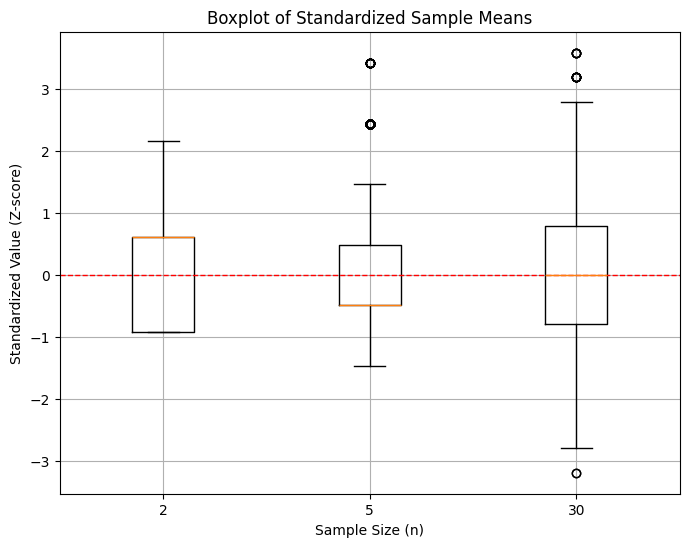

In [132]:
#@markdown **(a)** We transformed the 4 data sets and plotted the boxplots.
#@markdown What would happen if the sample size continued to increase?

# Parameters
o_values = [2, 5, 30, 500]

# Initialize arrays for storing the transformed values
transformed_values = {}

# Calculate the transformed values for each sample size
for o in o_values:
    promedios = promedios_de[str(o)]

    # Standardize the values
    mean = n * p
    std_dev = np.sqrt((n * p * (1 - p)) / o)
    transformed_values[str(o)] = (promedios - mean) / std_dev

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([transformed_values[str(s)] for s in o_values], labels=o_values)
plt.title("Boxplot of Standardized Sample Means")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standardized Value")
plt.grid()
plt.show()


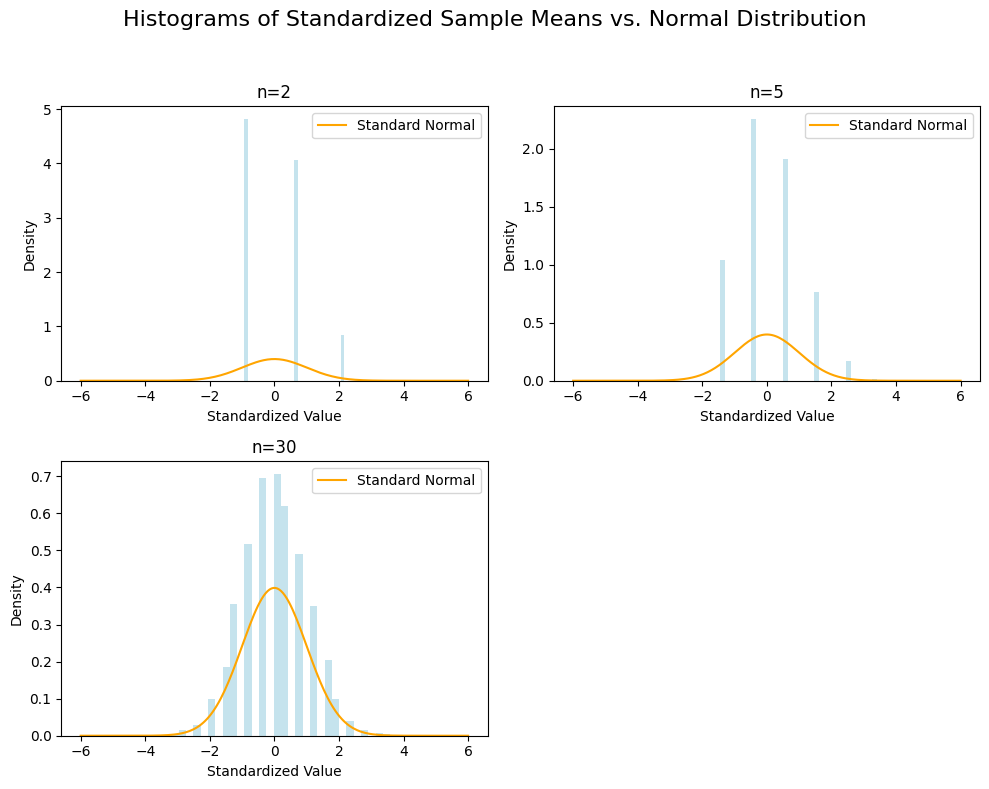

In [133]:
#@markdown **(b)** Realizar **4 histogramas** y a cada uno de ellos superponerle la **densidad de la normal estándar**.
# Standardized sample means for different sample sizes
o_values = [2, 5, 30, 500]

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Histograms of Standardized Sample Means vs. Normal Distribution", fontsize=16)

for i, o in enumerate(o_values):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Histogram for standardized sample means
    ax.hist(transformed_values[str(o)], bins=30, density=True, color="lightblue", alpha=0.7)

    # Plot the standard normal distribution curve
    x_range = np.linspace(-6, 6, 100)
    ax.plot(x_range, stats.norm.pdf(x_range), color="orange", label="Normal estándar")

    # Add legend
    ax.legend(loc="upper right")

    # Set title and labels
    ax.set_title(f"n={o}")
    ax.set_xlabel("Standardized Value")
    ax.set_ylabel("Density")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Goal:** Empirically verify the CLT using a **non-normal** distribution (Exponential) generated at scale with **PySpark**.

In [134]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CLT-PySpark-Mini").getOrCreate()
spark

## 1) Parameters
We use an **Exponential** distribution (skewed, non-normal) to show that **means** become approximately normal as `n` grows.

In [135]:
# Total groups per experiment (each group is one sample of size n)
G = 50_000        # number of groups
n_list = [5, 30, 100]  # sample sizes to compare
lam = 1.0         # Exponential rate, mean = 1/lam, var = 1/lam^2
seed = 123
(G, n_list, lam)


(50000, [5, 30, 100], 1.0)

## 2) Data Generation & Group Means
For each `n` in `n_list`, we generate `G*n` Exponential samples in Spark, label them by `group_id`, and compute **group means**.

In [136]:
from pyspark.sql import functions as F

def simulate_group_means_exponential(G:int, n:int, lam:float, seed:int):
    """
    Returns a Pandas Series of group means of size G.
    Each group has n i.i.d. Exponential(1/lam) draws.
    """
    N = G * n
    df = (spark.range(N)
          .withColumn("u", F.rand(seed))  # U(0,1)
          .withColumn("x", -F.log(1 - F.col("u")) / F.lit(lam))
          .withColumn("group_id", (F.col("id") / n).cast("long")))
    df_means = (df.groupBy("group_id")
                  .agg(F.avg("x").alias("mean"))
                  .orderBy("group_id"))
    return df_means.toPandas()['mean']

## 3) Standardize Group Means
Given true mean \(\mu=1/\lambda\) and SD of the mean \(\sigma/\sqrt{n}=(1/\lambda)/\sqrt{n}\), we form **Z-scores** to compare with \(\mathcal{N}(0,1)\).


In [137]:
import numpy as np

def z_scores_from_means(means, lam, n):
    mu = 1/lam
    sigma = 1/lam
    se = sigma / np.sqrt(n)
    return (means - mu) / se

## 4) Experiments for Different Sample Sizes
We compare histograms of standardized means (Z) for `n = 5, 30, 100`.  
As `n` increases, the histogram should align more closely with **Standard Normal**.


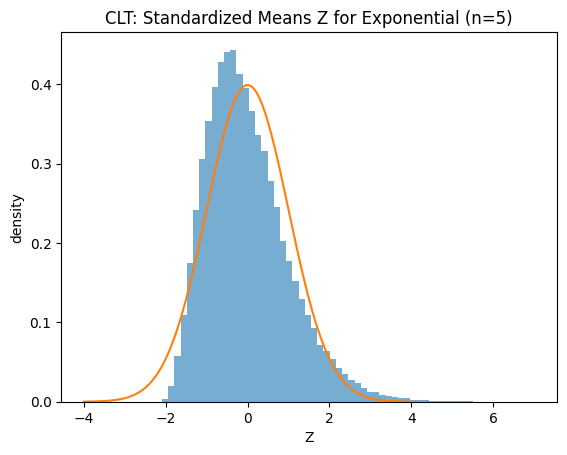

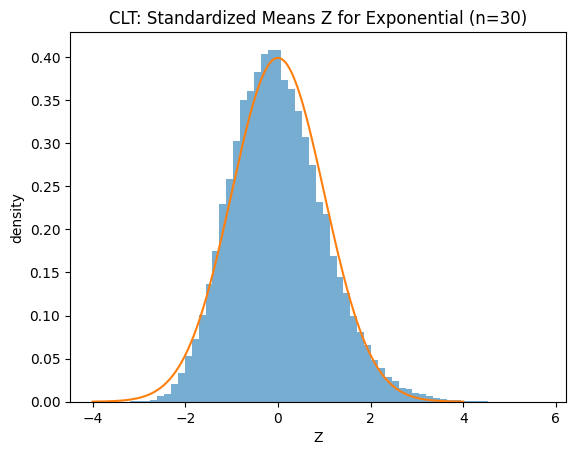

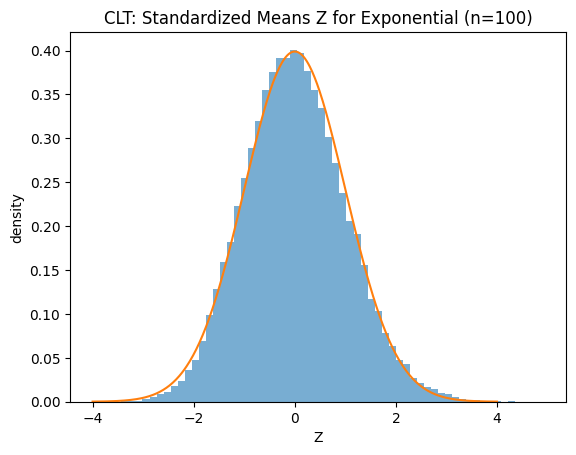

In [138]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

results = {}

for n in n_list:
    means = simulate_group_means_exponential(G, n, lam, seed)
    Z = z_scores_from_means(means, lam, n)
    results[n] = Z

    xs = np.linspace(-4, 4, 500)
    plt.figure()
    plt.hist(Z, bins=60, density=True, alpha=0.6)
    plt.plot(xs, norm.pdf(xs, 0, 1))
    plt.title(f"CLT: Standardized Means Z for Exponential (n={n})")
    plt.xlabel("Z")
    plt.ylabel("density")
    plt.show()

## 5) (Optional) QQ Check
A quick QQ-style check: compare sample Z quantiles to Normal quantiles.

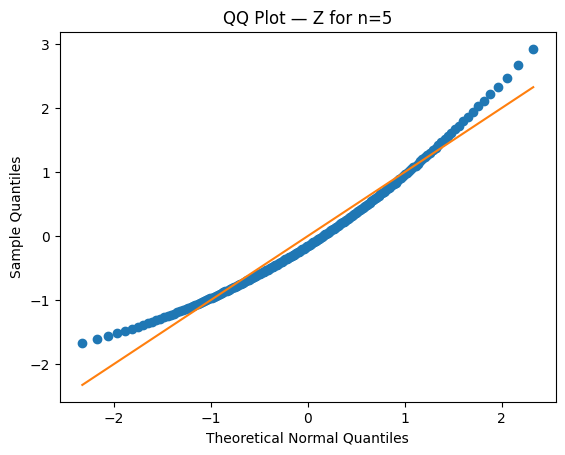

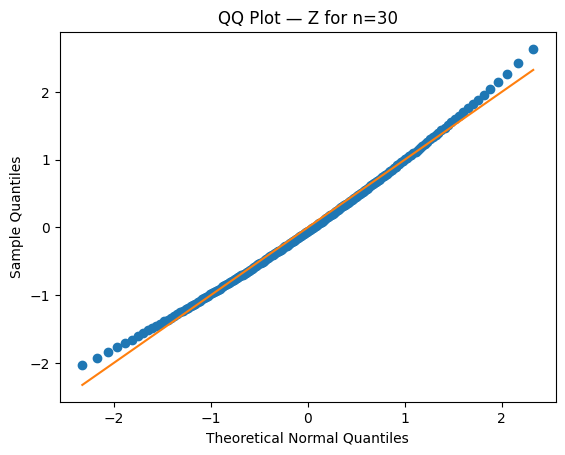

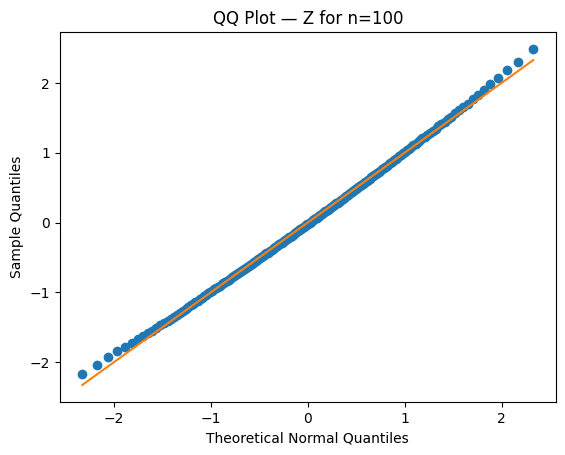

In [139]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def qq_plot(Z, title):
    Z_sorted = np.sort(Z)
    q = np.linspace(0.01, 0.99, 200)
    theo = norm.ppf(q)
    samp = np.quantile(Z_sorted, q)

    plt.figure()
    plt.plot(theo, samp, marker="o", linestyle="")
    plt.plot(theo, theo)
    plt.xlabel("Theoretical Normal Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.title(title)
    plt.show()

for n in n_list:
    qq_plot(results[n], f"QQ Plot — Z for n={n}")

## 6) Exercises
1. Change `n_list` to `[2, 5, 10, 30, 100, 300]`. How quickly does the Z histogram look Normal?
2. Replace the Exponential with a **Bernoulli(p)** variable and repeat the experiment. (Tip: true mean = `p`, variance = `p(1-p)`.)
3. Reduce `G` (e.g., 5,000) to speed up runs, then increase `G` for smoother histograms—what changes and why?
4. Try a heavier-tailed distribution (e.g., Lognormal) and observe how large `n` must be for a good Normal fit.

## 7) Takeaways
- Even for **skewed, non-normal** data (Exponential), the **sample mean** becomes approximately Normal as `n` grows.  
- Standardizing by the true standard error collapses different `n` to a common scale (Z), which should resemble \(\mathcal{N}(0,1)\).  
- Larger `n` improves the approximation; extreme skew/heavy tails need **larger** `n`.

<p align="left"><b><font face='Courier New' color="white" align="left" size=4>Copyright.</font></b>
<img alt="GIIAM" height="120px" src="https://pascualbravo.edu.co/investigacion/giiam/" align="right" hspace="10px" vspace="0px" height="120" width="350"">
                                                                                                                              
<font face='Verdana' size="2.5">
Andres Fernando Perez G. <a href="https://scienti.minciencias.gov.co/cvlac/visualizador/generarCurriculoCv.do?cod_rh=0000347507">  CvLAC</a><br>
I.U Pascual Bravo.<br>
Calle 73 # 73A – 226<br>
Medellín, Colombia. South America.
    
</p>
</font>
    
</p>
</font>



<center><b><font color='01b3c2' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="4">I.U Pascual Bravo.</font></b> </center>